In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn import linear_model 

In [2]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [3]:
df_OHstadia = patsy.dmatrix('match_stadium',data=df,return_type='dataframe')
df.join(df_OHstadia)

,hometeam_name,awayteam_name,home_goals,away_goals,match_date,match_timestamp,match_referee,match_stadium,match_attendance,home_possession,...,"match_stadium[T.Stamford Bridge, London]","match_stadium[T.The Hawthorns, West Bromwich]","match_stadium[T.The Valley, London]","match_stadium[T.Turf Moor, Burnley]","match_stadium[T.Vicarage Road, Watford]","match_stadium[T.Villa Park, Birmingham]","match_stadium[T.Vitality Stadium, Bournemouth]","match_stadium[T.Wembley Stadium, London]","match_stadium[T.White Hart Lane, London]","match_stadium[T.bet365 Stadium, Stoke]"
5567,Arsenal,Aston Villa,1,1,Sat 19 Aug 2006,1155996000000,Graham Poll,"Emirates Stadium, London",60023.0,72.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,Bolton Wanderers,Tottenham Hotspur,2,0,Sat 19 Aug 2006,1156004100000,Phil Dowd,"Macron Stadium, Bolton",22899.0,37.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,Everton,Watford,2,1,Sat 19 Aug 2006,1155996000000,Peter Walton,"Goodison Park, Liverpool",39691.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,Newcastle United,Wigan Athletic,2,1,Sat 19 Aug 2006,1155996000000,Martin Atkinson,"Sports Direct Arena, Newcastle",52227.0,55.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,Portsmouth,Blackburn Rovers,3,0,Sat 19 Aug 2006,1155996000000,Alan Wiley,"Fratton Park, Portsmouth",19502.0,44.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5572,Reading,Middlesbrough,3,2,Sat 19 Aug 2006,1155996000000,Mark Halsey,"Madejski Stadium, Reading",23802.0,52.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5573,Sheffield United,Liverpool,1,1,Sat 19 Aug 2006,1155987900000,Rob Styles,"Bramall Lane, Sheffield",31726.0,41.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5574,West Ham United,Charlton Athletic,3,1,Sat 19 Aug 2006,1155996000000,Howard Webb,"Boleyn Ground, London",34704.0,62.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5575,Chelsea,Manchester City,3,0,Sun 20 Aug 2006,1156086000000,Steve Bennett,"Stamford Bridge, London",41814.0,58.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5576,Manchester United,Fulham,5,1,Sun 20 Aug 2006,1156077000000,Andre Marriner,"Old Trafford, Manchester",75115.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.dropna(subset=['mean_attendance_delta'],inplace=True)

In [5]:
lsm = smf.ols('mean_attendance_delta ~ match_stadium*(home_prior_leaguerank + away_prior_leaguerank + matchweek)',
              data = df)
fit3 = lsm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     mean_attendance_delta   R-squared:                       0.248
Model:                               OLS   Adj. R-squared:                  0.211
Method:                    Least Squares   F-statistic:                     6.629
Date:                   Mon, 16 Jul 2018   Prob (F-statistic):          4.91e-115
Time:                           18:00:34   Log-Likelihood:                -30908.
No. Observations:                   3518   AIC:                         6.215e+04
Df Residuals:                       3350   BIC:                         6.319e+04
Df Model:                            167                                         
Covariance Type:               nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  -840.3208   2963.181     -0.284      0.777   -6650.149    4969.507
match_stadium[T.Anfield, Liverpool]                                        1496.7580   3002.724      0.498      0.618   -4390.600    7384.116
match_stadium[T.Bloomfield Road, Blackpool]                                1090.9245   3432.235      0.318      0.751   -5638.564    7820.413
match_stadium[T.Boleyn Ground, London]                                     1092.6269   3013.743      0.363      0.717   -4816.336    7001.590
match_stadium[T.Bramall Lane, Sheffield]                                   6931.5973   9779.721      0.709      0.479   -1.22e+04    2.61e+04
match_stadium[T.Cardiff City Stadium, Cardiff]                             4066.1515   4657.018      0.873      0.383   -5064.736    1.32e+04
match_stadium[T.Carrow Road, Norwich]                                      1376.7585   3139.506      0.439      0.661   -4778.784    7532.301
match_stadium[T.Craven Cottage, London]                                    2263.4345   3058.866      0.740      0.459   -3733.999    8260.868
match_stadium[T.DW Stadium, Wigan]                                          288.6857   3137.803      0.092      0.927   -5863.517    6440.889
match_stadium[T.Emirates Stadium, London]                                   898.4566   2997.835      0.300      0.764   -4979.316    6776.229
match_stadium[T.Etihad Stadium, Manchester]                                1071.2654   2986.309      0.359      0.720   -4783.908    6926.438
match_stadium[T.Ewood Park, Blackburn]                                     1029.9348   3162.633      0.326      0.745   -5170.953    7230.823
match_stadium[T.Fratton Park, Portsmouth]                                  2721.0384   3104.266      0.877      0.381   -3365.410    8807.487
match_stadium[T.Goldsands Stadium, Bournemouth]                            1314.2692   5174.532      0.254      0.800   -8831.294    1.15e+04
match_stadium[T.Goodison Park, Liverpool]                                  1194.4071   3006.857      0.397      0.691   -4701.054    7089.868
match_stadium[T.John Smith's Stadium, Huddersfield]                         822.9395   3281.294      0.251      0.802   -5610.603    7256.482
match_stadium[T.KCOM Stadium, Hull]                                        2060.9963   3104.497      0.664      0.507   -4025.904    8147.897
match_stadium[T.King Power Stadium, Leicester]                              911.3111   3037.140      0.300      0.764   -5043.525    6866.147
match_stadium[T.Liberty Stadium, Swansea]                           

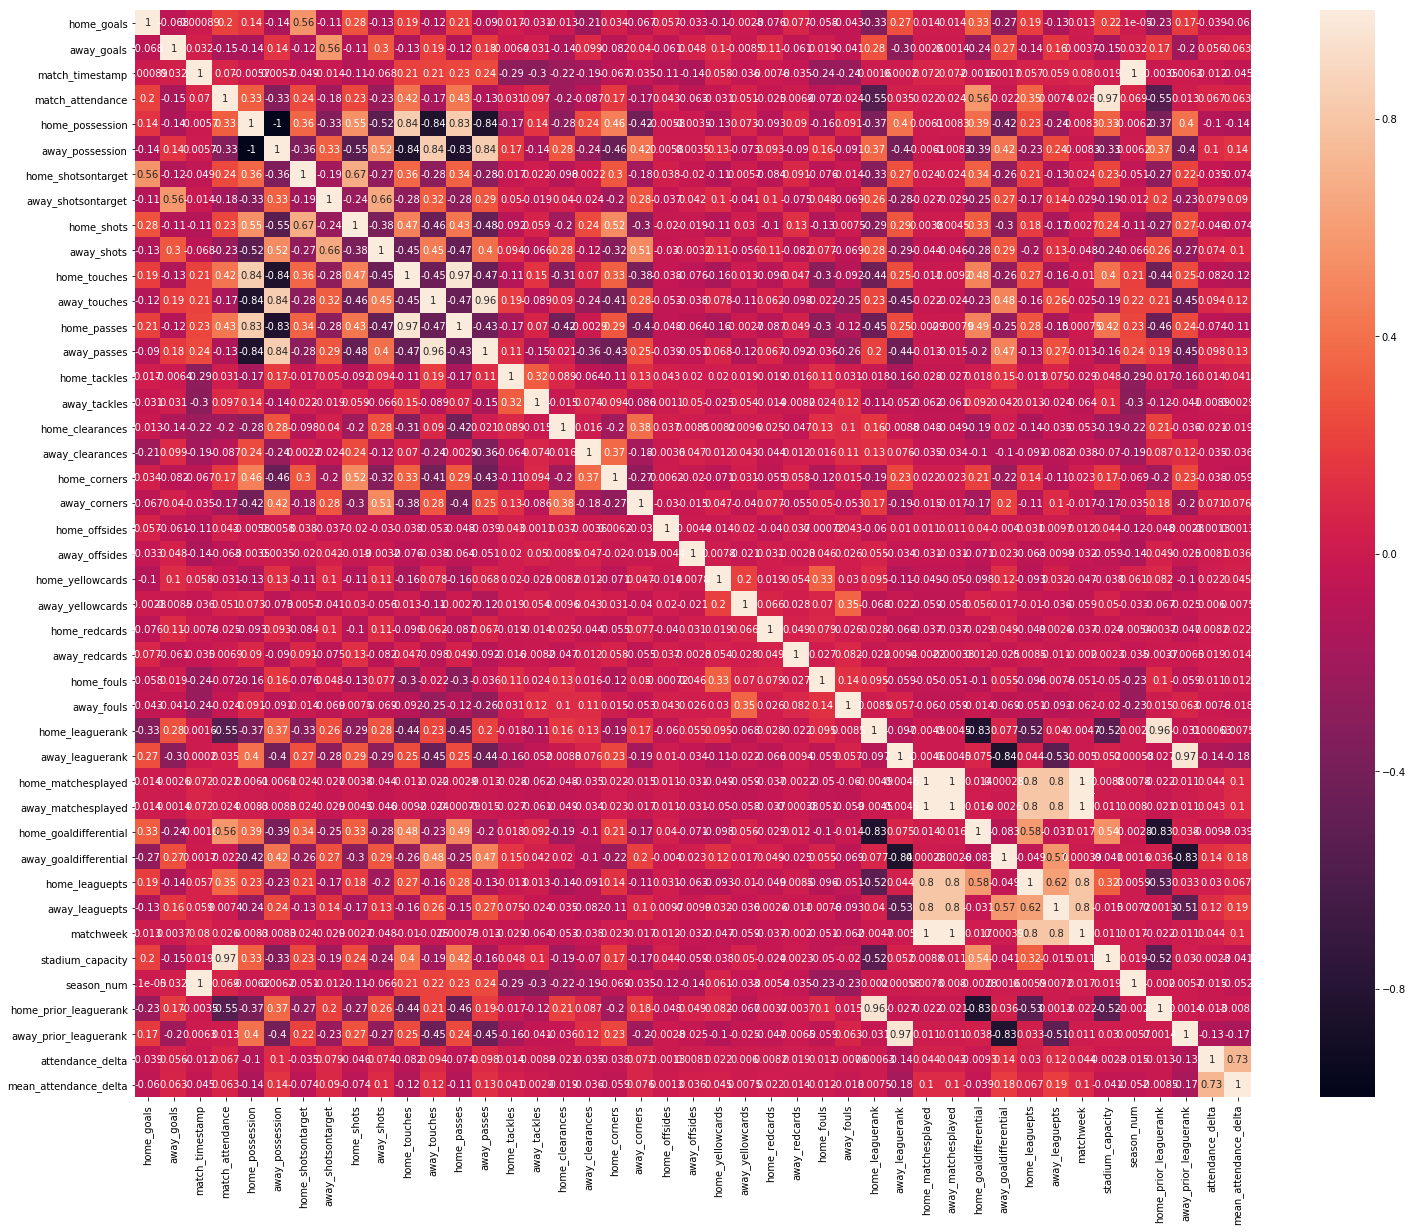

In [6]:
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True)

In [7]:
df.corr()['attendance_delta'].sort_values()

target                  -0.272832
away_leaguerank         -0.138880
away_prior_leaguerank   -0.128479
home_possession         -0.104174
home_touches            -0.082248
home_passes             -0.074197
away_clearances         -0.041299
home_corners            -0.041254
home_goals              -0.039914
home_shotsontarget      -0.036944
home_shots              -0.029650
away_tackles            -0.019288
away_fouls              -0.018305
season_num              -0.016461
home_clearances         -0.014858
match_timestamp         -0.013806
home_prior_leaguerank   -0.013640
home_goaldifferential   -0.009150
home_redcards           -0.004604
stadium_capacity        -0.000893
home_leaguerank          0.001969
home_offsides            0.007545
away_yellowcards         0.007742
away_offsides            0.008417
home_fouls               0.013441
home_tackles             0.013827
away_redcards            0.015264
away_shots               0.025242
home_yellowcards         0.028411
home_leaguepts

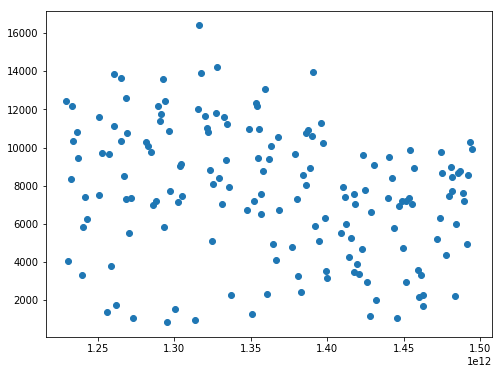

In [17]:
plt.figure(figsize=[8,6])
df2 = df[df['hometeam_name'] == 'Sunderland']
plt.scatter(df2['match_timestamp'], df2['target'])